## Сингулярное разложение (SVD)

<b>Сингулярное разложение (Singular Values Decomposition, SVD)</b> является удобным методом при работе с матрицами. Cингулярное разложение показывает геометрическую 
структуру матрицы и позволяет наглядно представить имеющиеся данные. Сингулярное разложение используется при решении самых разных задач — от приближения
методом наименьших квадратов и решения систем уравнений до сжатия и распознавания изображений. <br>Используются разные свойства сингулярного разложения, например, способность показывать ранг матрицы и приближать матрицы данного ранга.
Так как вычисления ранга матрицы — задача, которая встречается очень часто, то
сингулярное разложение является довольно популярным методом.

## Использование SVD для сжатия картинки

(638, 638) (638,) (960, 960)


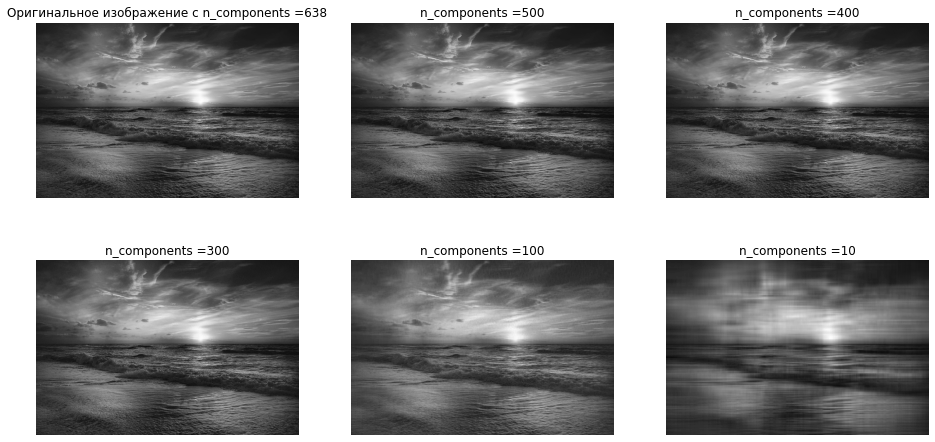

In [21]:
# Скачать изображение можно здесь "https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Считываем изображение в черно-белом виде
img = cv2.imread('image.jpg', 0)

# Получаем матрицы для алгоритма SVD
U, S, V = np.linalg.svd(img)

# Проверяем размерность матриц
print(U.shape, S.shape, V.shape)

# Строим изображение с разным comps
comps = [638, 500, 400, 300, 100, 10]

plt.figure(figsize = (16, 8))
for i in range(6):
  low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Оригинальное изображение с n_components =" + str(comps[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

# Если ячейка не сработает, результат работы алгоритма ниже:
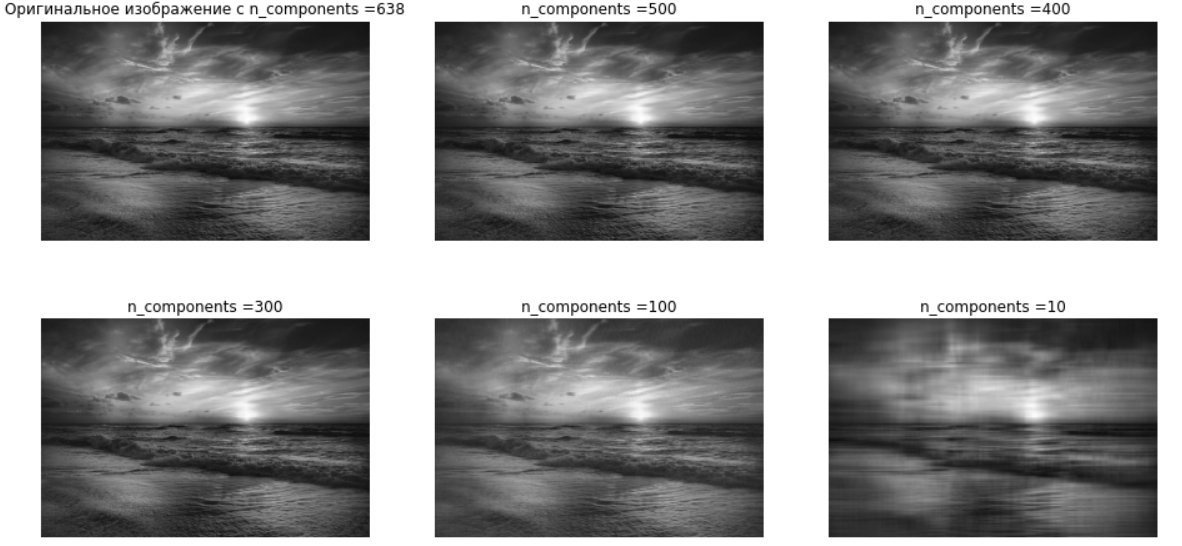

Задача сжатия фотографий достаточно распростаранненая. Многие соц соти, например ВК, сжимают фотографии, чтобы они занимали меньше места на физических носителях. Если сравнить полученные изображения, при разной степени сжатия, то картинки в первом ряду выглядят почти идентичны и для человеческого глаза, почти неотличимы. Однако, для размера изображения эти изменения существенны, и если предположим, у нас закончилась память на мобильном телефоне при съемке, то сжав 1000 фотографий в галерее, то в память может поместиться еще 30-50 фотографий.
<br> Сжатие изображений использует тот факт, что только некоторые из сингулярных значений, полученных после SVD, являются большими. Вы можете обрезать три матрицы на основе нескольких первых сингулярных значений и получить сжатую аппроксимацию исходного изображения. 

## Задача кластеризиации SVD

Предположим, что человеку дали задачу кластеризации, для данного набора данных

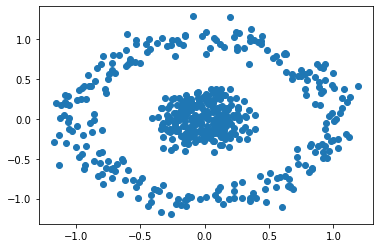

In [22]:
# импортируем все нужные библиотеки
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# генерируем данные
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# отображаем данные
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Скорее всего, человек бы справился с задачей примерно так:

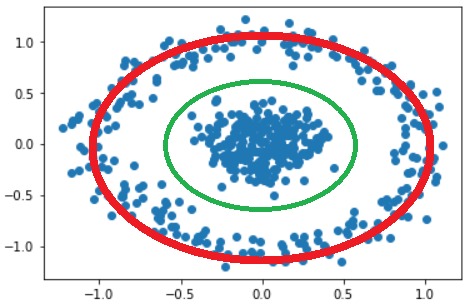

Выделил бы в отдельную группу "внешний" (красный) круг данных, и в отдельную группу "внутренний"(зеленый)

<b>Посмотрим, как справится алгоритм SVD с данной задачей:</b>

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


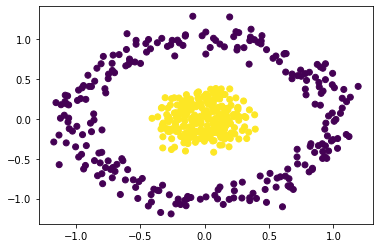

In [23]:
# тренируем и предсказываем
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# отображаем кластеризированные данные
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()

<b>Посмтрим как кластеризирует kMeans при n_ckusters=4</b>

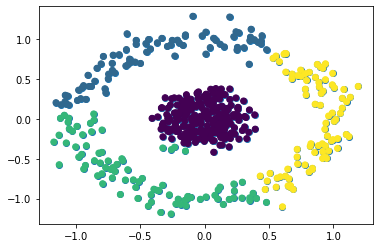

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:, 0], X[:, 1], c = pred_y)
plt.show()

<b>И кластеризация kMeans при n_clusters = 2</b>

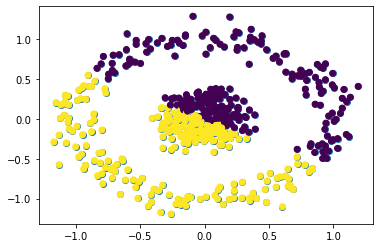

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:, 0], X[:, 1], c = pred_y)
plt.show()

Можно заметить, что с таким видом данных, метод SVD справился с задачей кластеризаций лучше, чем метод kMeans. Это не говорит, что kMeans работает всегда хуже, чем SVD, просто при таком виде данных он сработал лучше. 

## Описание алгоритма SVD

SVD имеет дело с разложением матрицы на произведение трех матриц, как показано:
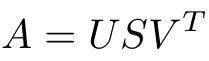

Если представим, что матрица А размеров <i>m</i>x<i>n</i>, тогда:
<ul>
    <li>U тогда будет <i>mxm</i> унитарная матрица из <b>левых сингулярных векторов</b></li>
    <li>S диагональная матрица размером <i>nxm</i>, где значения (Сингулярные значения) главное диагонали расположены в убывающем порядке</li>
    <li>V тогда будет <i>nxn</i> унитарная матрица из <b>правых сингулярных векторов</li>
</ul>

Для чего производится такое, довольно непростое разложение матрицы? Причину можно понять по альтернативному представлению разложения:
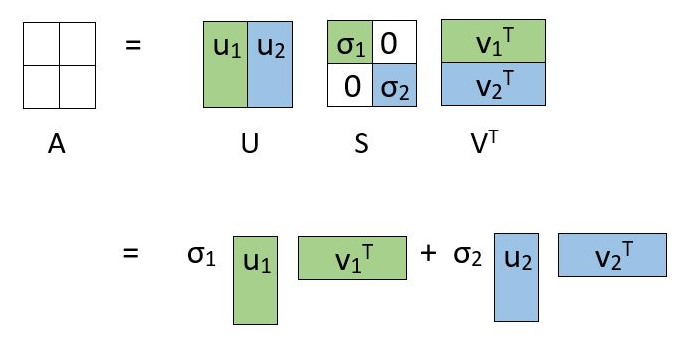

Разложение позволяет нам выразить нашу исходную матрицу как <b>линейную комбинацию матриц низкого ранга.</b>
В практическом применении вы заметите, что только несколько первых, скажем k, сингулярных значений велики. Остальные сингулярные значения стремятся к нулю. В результате последние значения k, <b>можно игнорировать без потери большей части информации.</b> Посмотрите, как матрицы усечены на рисунке ниже:
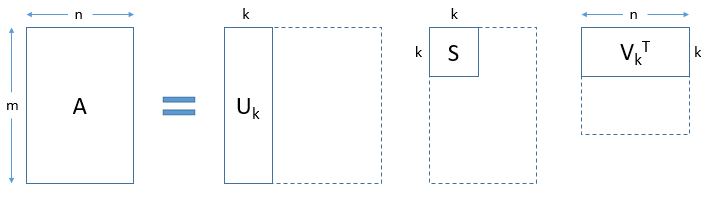

<b>Подводя итоги, можно сказать</b>
<ul>
    <li>Используя алгоритм SVD мы можем представить нашу более "большую" матрицу A, как "маленькие" матрицы U,S и V </li>
    <li>Это полезно в больших вычислениях.</li>
    <li>Мы можем получить k-ранговую аппроксимацию A. Для этого выберите первые k сингулярных значений и соответственно обрежьте 3 матрицы.</li>
</ul>